# EDA of Frames

## Install Dependencies

## Import Dependencies

In [16]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

## Load Example Parquet Data

In [17]:
# load example parquet file
df = pd.read_parquet('../data/asl-signs/train_landmark_files/16069/100015657.parquet')
df.shape

(57015, 7)

In [18]:
df.head()

,frame,row_id,type,landmark_index,x,y,z
0,103,103-face-0,face,0,0.437886,0.437599,-0.051134
1,103,103-face-1,face,1,0.443258,0.392901,-0.067054
2,103,103-face-2,face,2,0.443997,0.409998,-0.042990
3,103,103-face-3,face,3,0.435256,0.362771,-0.039492
4,103,103-face-4,face,4,0.443780,0.381762,-0.068013


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57015 entries, 0 to 57014
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frame           57015 non-null  int16  
 1   row_id          57015 non-null  object 
 2   type            57015 non-null  object 
 3   landmark_index  57015 non-null  int16  
 4   x               53193 non-null  float64
 5   y               53193 non-null  float64
 6   z               53193 non-null  float64
dtypes: float64(3), int16(2), object(2)
memory usage: 2.4+ MB


In [20]:
df.describe() # doesn't make much sense

,frame,landmark_index,x,y,z
count,57015.00000,57015.000000,53193.000000,53193.000000,53193.000000
mean,155.00000,202.994475,0.438283,0.457483,-0.047699
std,30.30978,146.791506,0.115117,0.268900,0.294060
min,103.00000,0.000000,-0.042923,0.248094,-2.838325
25%,129.00000,60.000000,0.372952,0.361456,-0.039124
50%,155.00000,196.000000,0.424128,0.409588,-0.009181
75%,181.00000,332.000000,0.489478,0.474334,0.025908
max,207.00000,467.000000,1.197836,2.591290,1.587503


## Visualizing Single Frame

/Users/jin-holee/neuefische/Capstone_Project_SignMeUp/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


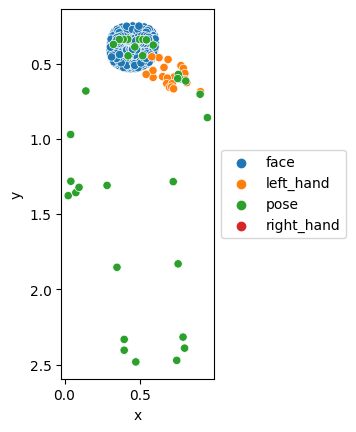

In [21]:
x = df[df.frame == 103].x
y = df[df.frame == 103].y
fig = sns.scatterplot(x, y, hue=df[df.frame == 103].type)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.gca().invert_yaxis()
plt.axis('scaled')
plt.show(fig)

## Number of Frames

In [22]:
# load train.csv annotation file
df_train = pd.read_csv('../data/asl-signs/train.csv')
df_train.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [23]:
# load first parquet file in train.csv
i = 1
df_parquet = pd.read_parquet('../data/asl-signs/' + df_train.path[i])

In [24]:
n_frames = df_parquet.frame.nunique()
sign = df_train.sign[i]
n_frames, sign

(11, 'wait')

In [25]:
df_train.shape[0]

94477

In [26]:
""" # list comprehension loop over all rows in train.csv dataframe to get the number of frames
i_max = 1000
n_frames_all_comp = [pd.read_parquet('../data/asl-signs/' + df_train.path[i]).frame.nunique() for i in range(i_max)] """

" # list comprehension loop over all rows in train.csv dataframe to get the number of frames\ni_max = 1000\nn_frames_all_comp = [pd.read_parquet('../data/asl-signs/' + df_train.path[i]).frame.nunique() for i in range(i_max)] "

In [27]:
i_min = 0
i_max = df_train.shape[0]
#i_max = 68368 # parquet file in row 68369 is corrupted
n_frames_all = [] # container for all numbe rof frames

# loop over all rows in train.csv dataframe to get the number of frames
for i in range(i_min, i_max): 
    if i == 0:
        print(i)
    if i%100 == 0: 
        print(i)
    if i == i_max: 
        print(i)
    df_parquet = pd.read_parquet('../data/asl-signs/' + df_train.path[i])
    n_frames = df_parquet.frame.nunique()
    n_frames_all.append(n_frames)

0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400


In [28]:
# cannot concatenate object of type ''; only Series and DataFrame objs are valid
n_frames_all = pd.Series(n_frames_all, name='n_frames') # convert to pd.Series

In [29]:
df_frames = pd.concat([n_frames_all, df_train.sign, df_train.participant_id], axis=1)

Getting all number of frames took about 6-7 minutes. So let's save it into a .csv file

In [30]:
df_frames.to_csv('../data/n_frames.csv', index=False)

### Number of Frames per Sign

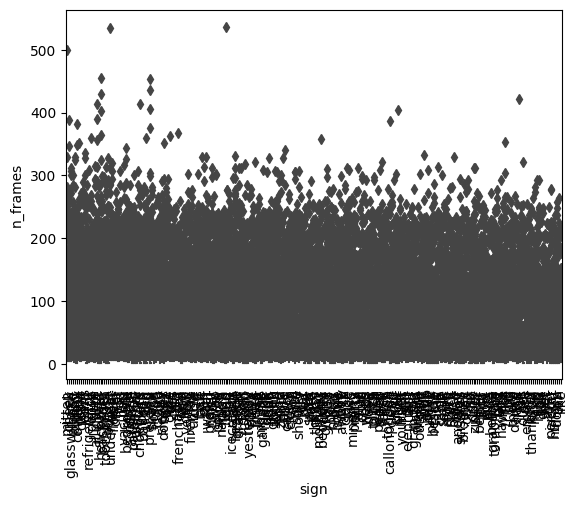

In [31]:
# order by decreasing mean
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index
# boxplot
sns.boxplot(data=df_frames, x="sign", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()

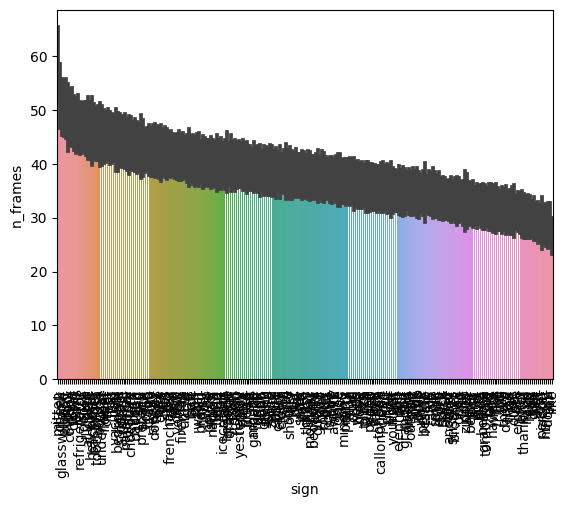

In [32]:
# order by decreasing mean
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index
# barplot
sns.barplot(data=df_frames, x="sign", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()


### Number of Frames per Participant

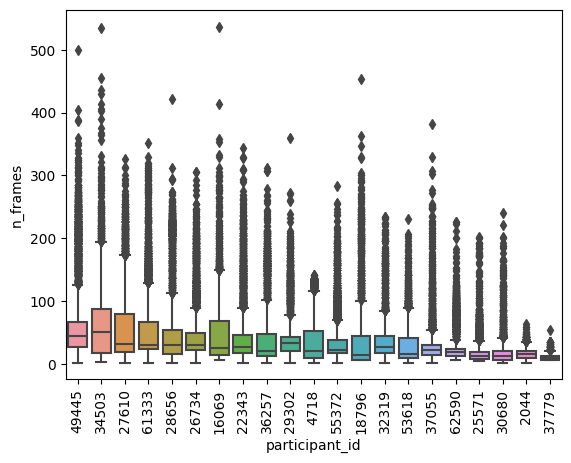

In [33]:
# order by decreasing mean
my_order = df_frames.groupby(by=["participant_id"])["n_frames"].mean().sort_values(ascending=False).index
# boxplot
sns.boxplot(data=df_frames, x="participant_id", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()

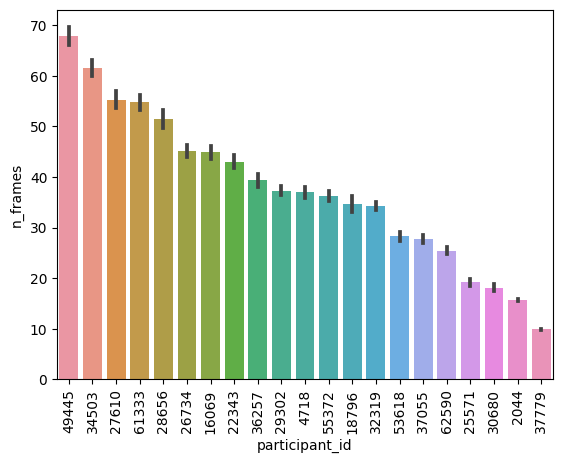

In [34]:
# order by decreasing mean
my_order = df_frames.groupby(by=["participant_id"])["n_frames"].mean().sort_values(ascending=False).index
# barplot
sns.barplot(data=df_frames, x="participant_id", y="n_frames", order=my_order)
plt.xticks(rotation=90)
plt.show()


Some participants (49445) needed up to almost 70 frames per sequence, and others (37779) down to only 10 frames per sequence. 

### Sanity Check: Look at the distribution of signs per participant
To exclude, that the participants with lowest/highest number of frames are enriched in certain words (e.g. short/long signs). 

In [35]:
df_frames = pd.read_csv('../data/n_frames.csv')
df_frames.head()

,n_frames,sign,participant_id
0,23,blow,26734
1,11,wait,28656
2,105,cloud,16069
3,12,bird,25571
4,18,owie,62590


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

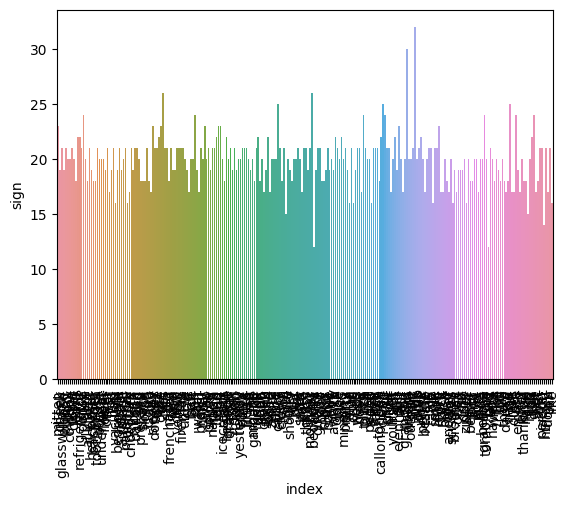

In [37]:
data = df_frames[df_frames.participant_id == 49445].sign.value_counts().reset_index() # participant with highest number of frames
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index # order by increasing mean number of frames

sns.barplot(data=data, x="index", y="sign", order=my_order)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

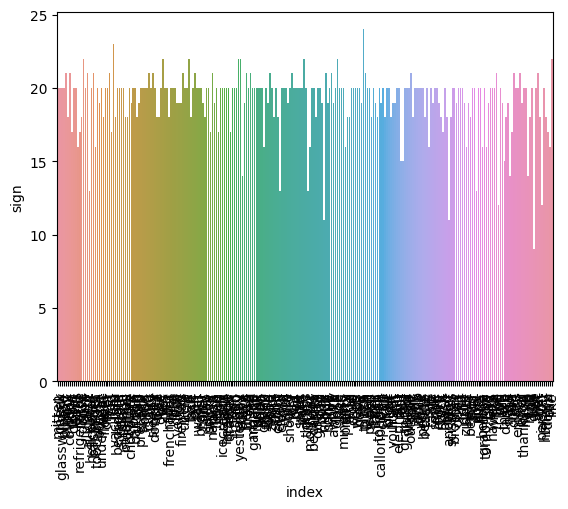

In [38]:
data = df_frames[df_frames.participant_id == 37779].sign.value_counts().reset_index() # participant with lowest number of frames
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index # order by increasing mean number of frames

sns.barplot(data=data, x="index", y="sign", order=my_order)
plt.xticks(rotation=90)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


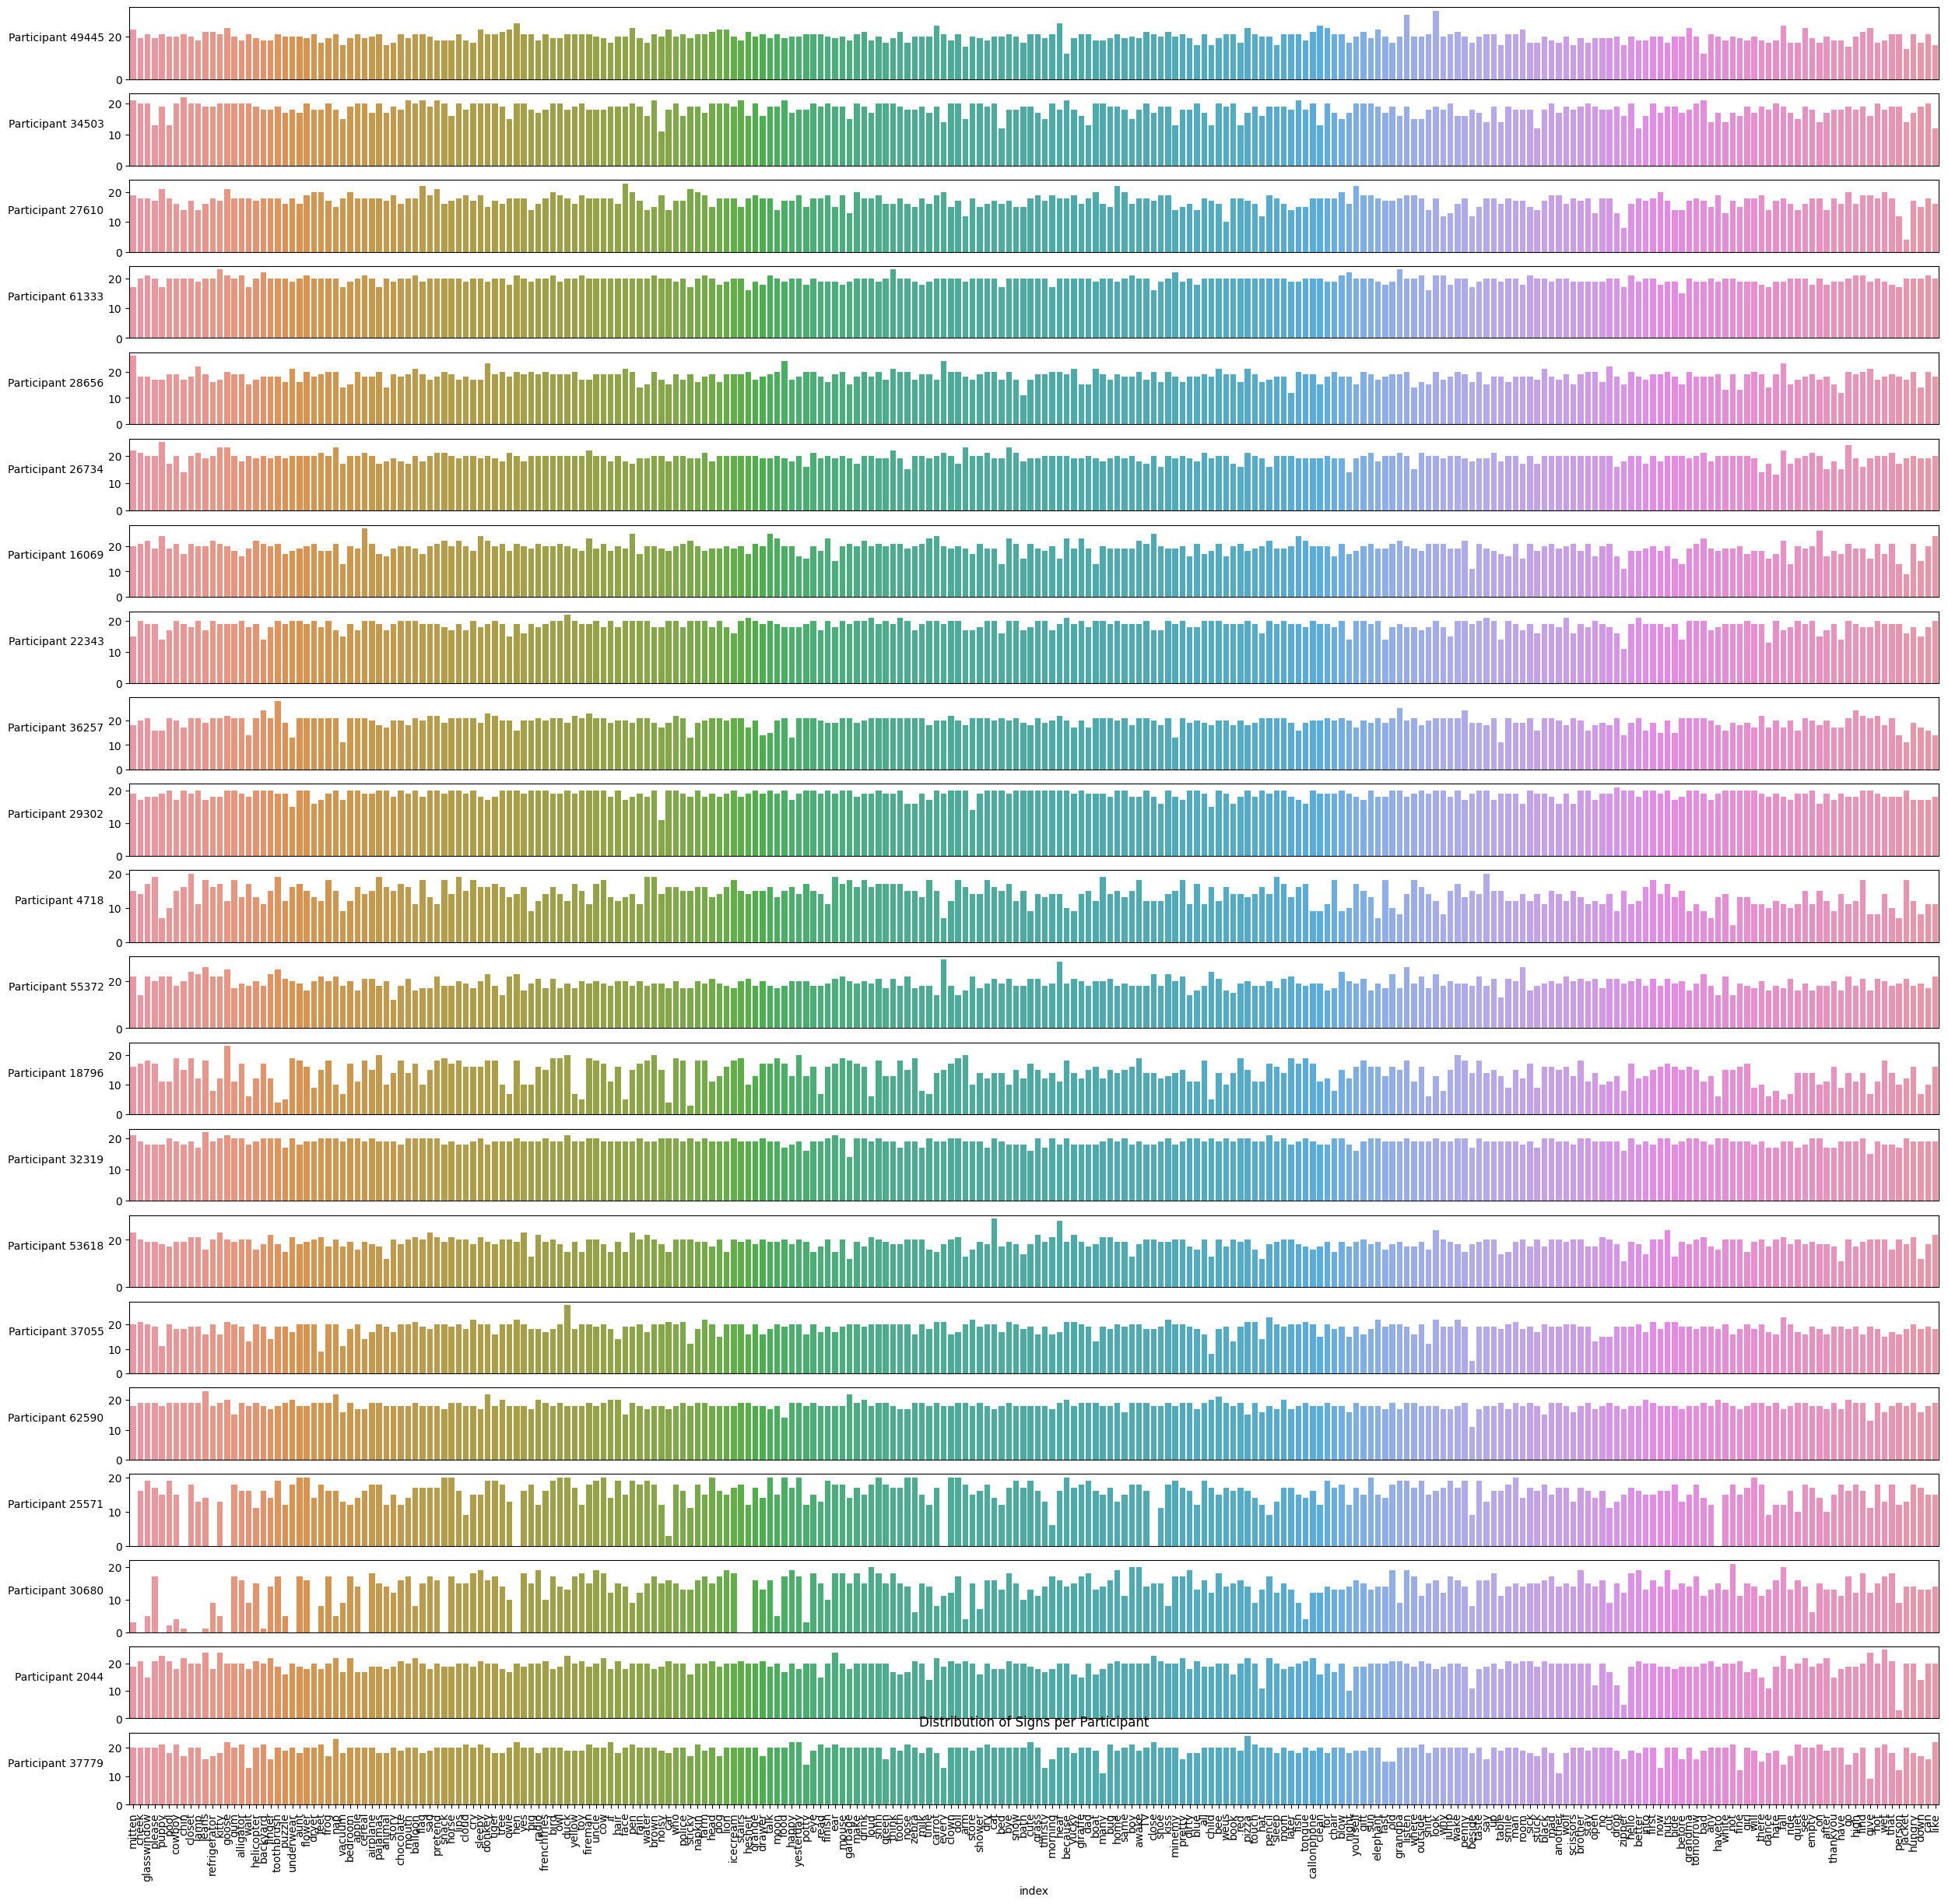

In [40]:
# plotting parameters
participants = df_frames.groupby(by=["participant_id"])["n_frames"].mean().sort_values(ascending=False).index # list of participants sorted by ascending number of frames
ncols = 1 # define plot matrix columns always as 3 
nrows = math.ceil(len(participants)/ncols) # define rows depending on the number of participants / categories
my_order = df_frames.groupby(by=["sign"])["n_frames"].mean().sort_values(ascending=False).index # order by increasing mean number of frames

# formatting plotting areas
f, axes = plt.subplots(nrows, ncols, figsize=(30, 30)) # define plot area layout based on pre-defined number of columns and rows
axes = axes.ravel() # flatten axes object to later access it as axes[i] with i indicating the heatmap number

# loop over all available participants to plot each sign distribution
for i in range(len(participants)): 
    print(i)
    participant = participants[i]

    # sign count data for current participant 
    sign_counts = df_frames[df_frames.participant_id == participant].sign.value_counts().reset_index() 

    # plot
    g = sns.barplot(ax=axes[i], data=sign_counts, x="index", y="sign", order=my_order)

    # remove y axis labels
    g.set_ylabel(ylabel=f'Participant {participant}', rotation=0, horizontalalignment='right')

    # show xticks labels only for the last row
    if i != len(participants)-1: 
        g.set(xticklabels=[]) 
        g.set(xlabel=None)
        g.tick_params(bottom=False)  # remove the ticks
    else: 
        g.set_xticklabels(g.get_xticklabels(), rotation=90)
        
# final plotting
plt.title('Distribution of Signs per Participant')
plt.show()